<a href="https://colab.research.google.com/github/priya713/Guava-leaf-prediction/blob/main/identify_the_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dir= 'D:\\Users\\PRIYA\\Pictures\\leaf'
categories=['bacterial leaf','algal','fusarium']
data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        leaf_img=cv2.imread(imgpath,0)
        leaf_img=cv2.resize(leaf_img,(50,50))
        image=np.array(leaf_img).flatten()
        data.append([image,label])
print("The total is")
print(len(data))
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

The total is
32


SVM [1 1 0 2 1 1 2]
DecisionTree [1 2 2 2 2 2 1]
Accuracy:  0.5714285714285714
Prediction:  algal


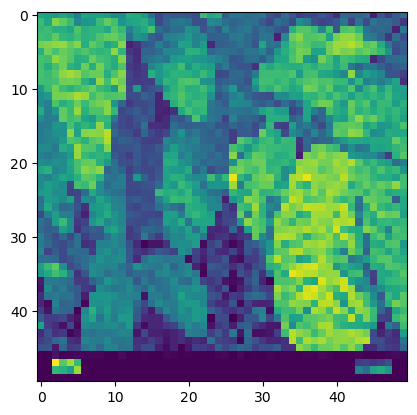

Accuracy:  0.5714285714285714
Prediction:  algal


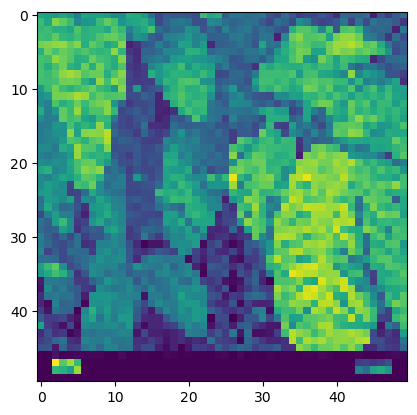

In [ ]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)


xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2)
model= SVC(C=1,kernel='linear')
model.fit(xtrain, ytrain)
predicted=model.predict(xtest)
print("SVM",predicted)


xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predicted1=model.predict(xtest)
print("DecisionTree",predicted1)

pick= open('model.sav','rb')
model=pickle.load(pick)
pick.close()

#prediction= model.predict(xtest)

accuracy= model.score(xtest,ytest)
categories=['bacterial leaf','algal','fusarium']

print('Accuracy: ',accuracy)

print('Prediction: ',categories[predicted[0]])

myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf)
plt.show()

accuracy= model.score(xtest,ytest)
categories=['bacterial leaf','algal','fusarium']

print('Accuracy: ',accuracy)
1
print('Prediction1: ',categories[predicted1[0]])

myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf)
plt.show()

In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_rel(predicted, predicted1)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -1.5491933384829668
P-Value: 0.1723082967304001
